### Построение модели логистической регрессии, настройка гиперпараметров на кросс-валидации, интерпретация коэффициентов.
Цель: В этом домашнем задании вы потренируетесь в настройке модели логистической регрессии, подборе коэффициента регуляризации и интерпретации результатов.
Снова про болезни, на этот раз про рак груди. Нужно научиться предсказывать, является ли клеточное образование злокачественным или нет. 

1) Скачайте данные с Kaggle - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv

2) Как всегда - базовые статистики, визуализации (распределения, корреляции, pair-plots). В тех графиках, которые это позволяют, раскрасьте значения в зависимости от того, является опухоль злокачественной или нет.

3) Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, во время предобработки, уберите переменные, корреляция пирсона между которыми превышает 0.85. Разбейте данные на train-test, отложив 30% выборки для тестирования. Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. 

4) Постройте модель логистической регрессии "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.

5) Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную. Сделайте интересные выводы :) 

Бонусное задание - постройте также модель KNN с настройкой числа соседей на CV. У какой модели качество оказалось выше? 

Критерии оценки: Максимум - 10 баллов.

За качественную предобработку и визуализации - 5 баллов, за настройку и визуализацию коэффициентов моделей - еще 5 баллов.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [2]:
data = pd.read_csv('data.csv', sep = ',')
data.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
# Имеем 569 наблюдений и 33 колонки. Пропусков в данных нет


In [5]:
# Признак "Unnamed: 32" пустой, удалим его:
data.drop('Unnamed: 32', axis = 1, inplace = True)
data.shape


(569, 32)

In [6]:
data['id'].nunique()


569

In [7]:
# все значения id уникальны - удалим и его:
data.drop('id', axis = 1, inplace = True)


In [8]:
data.head()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [9]:
data['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
data['diagnosis'].value_counts(normalize = True)


B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

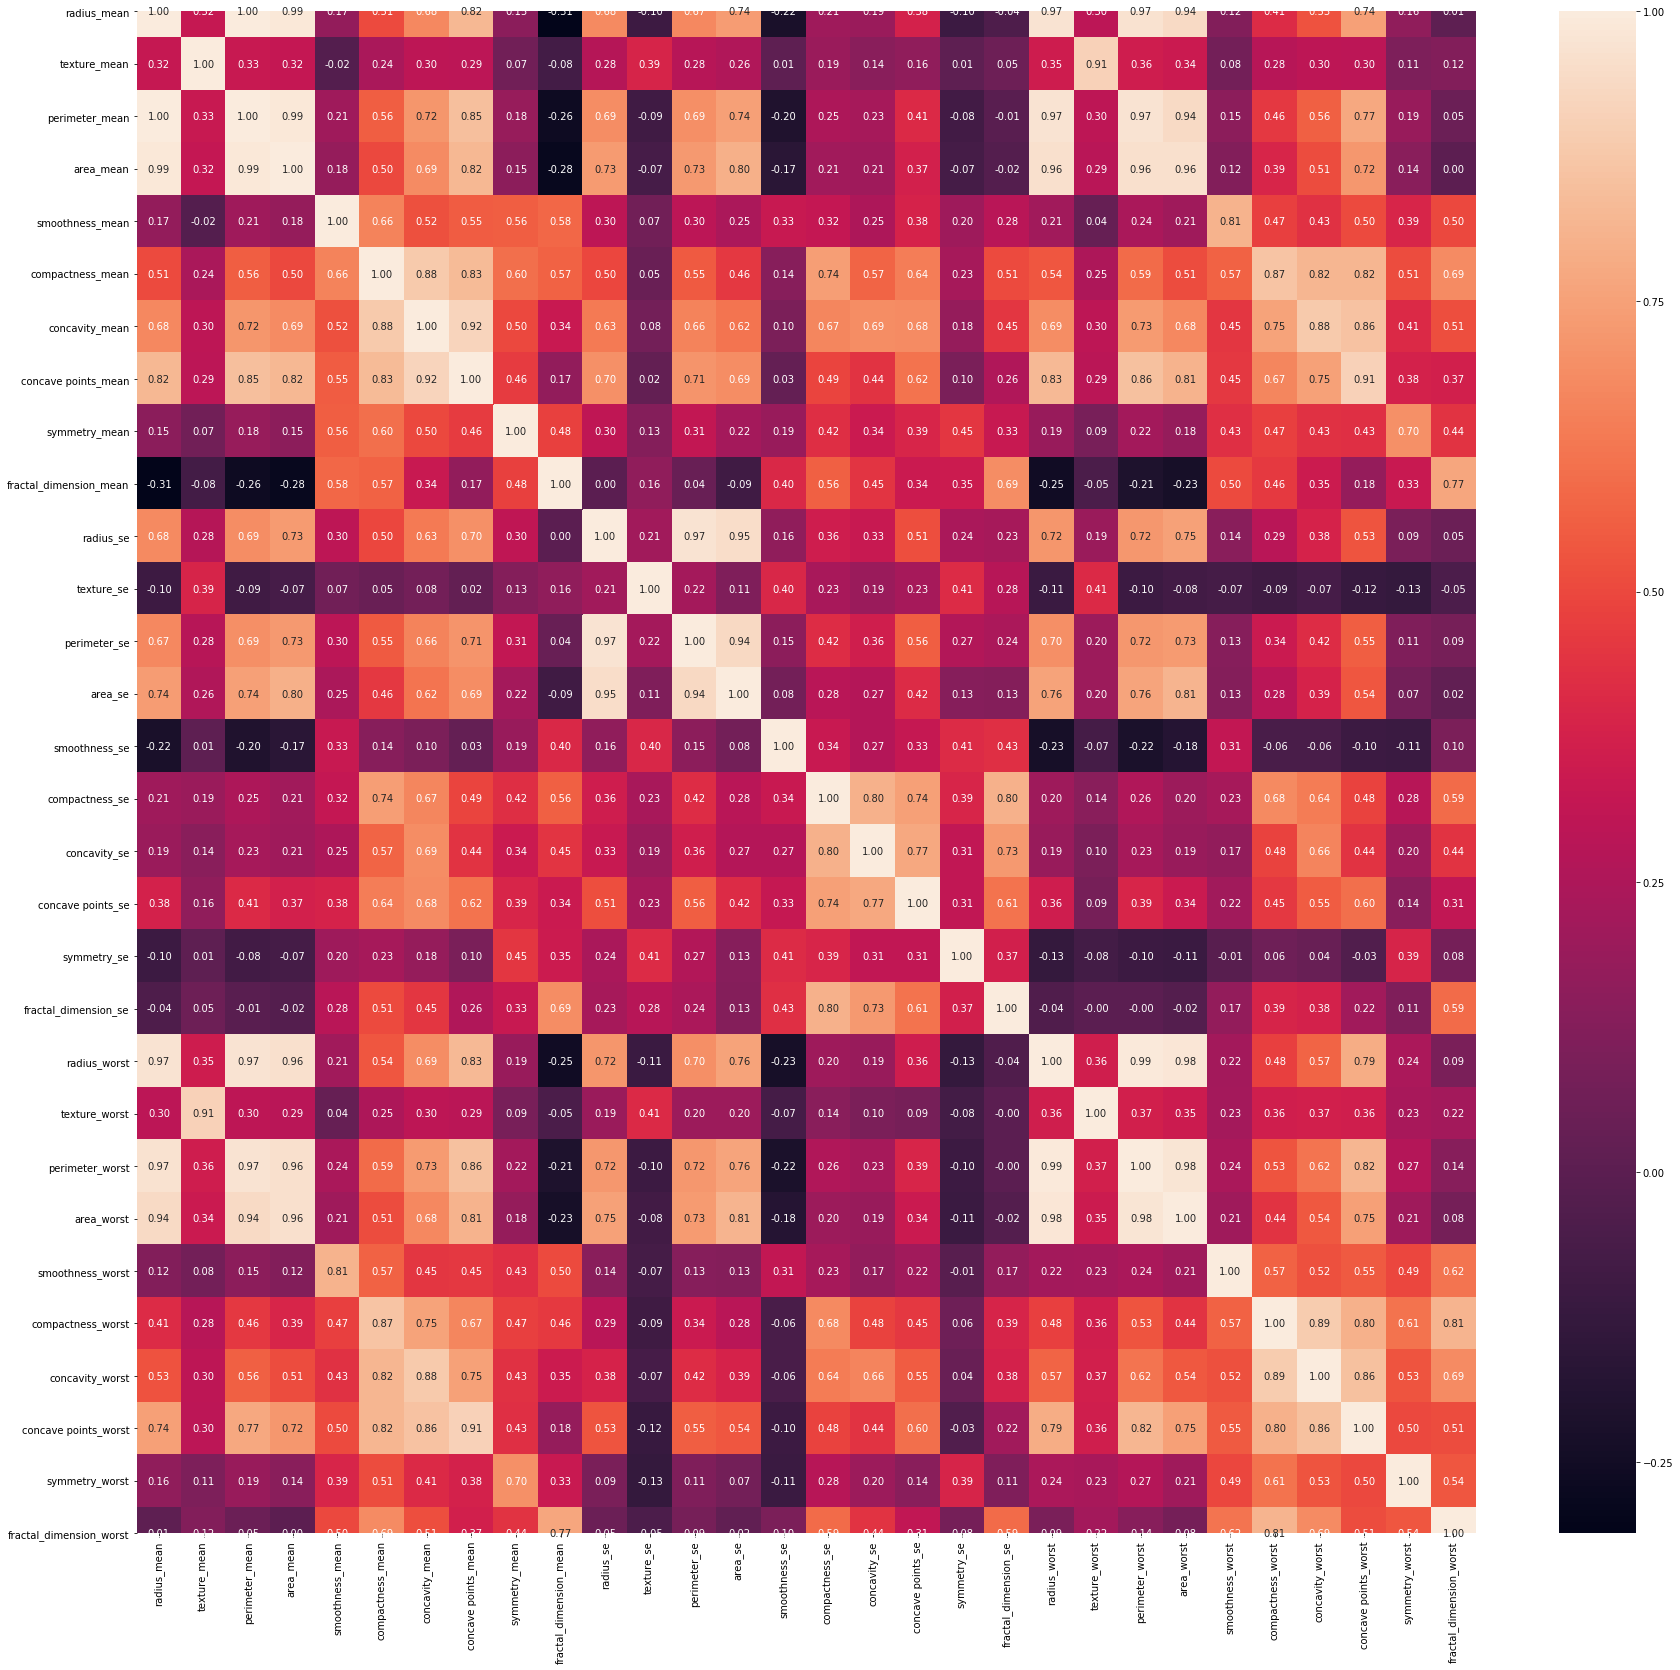

In [11]:
Corr = data.corr()

plt.figure(figsize = (30, 28))
sns.heatmap(Corr, annot = True, fmt = '.2f');


In [12]:
# На heatmap видны большие значения корреляции
# Уберем данные, корреляция Пирсона которых более 0,85. Найдем их:

CorField = []
CorPairs = []

for i in Corr:
    for j in Corr.index[Corr[i] > 0.85]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            CorPairs.append([i, j, Corr[i][Corr.index == j].values[0]])
            print (i, '-->', j, ': R =', Corr[i][Corr.index == j].values[0])


radius_mean --> perimeter_mean : R = 0.9978552814938113
radius_mean --> area_mean : R = 0.9873571700566119
radius_mean --> radius_worst : R = 0.9695389726112053
radius_mean --> perimeter_worst : R = 0.9651365139559878
radius_mean --> area_worst : R = 0.9410824595860459
texture_mean --> texture_worst : R = 0.9120445888404215
compactness_mean --> concavity_mean : R = 0.8831206701772499
compactness_mean --> compactness_worst : R = 0.8658090398022638
concave points_mean --> concave points_worst : R = 0.9101553142985934
radius_se --> perimeter_se : R = 0.9727936770160752
radius_se --> area_se : R = 0.95183011211099


In [13]:
data.drop(CorField, axis = 1, inplace = True)
data.shape


(569, 20)

In [14]:
data.iloc[:, :10].describe()


radius_mean  texture_mean  smoothness_mean  compactness_mean  \
count   569.000000    569.000000       569.000000        569.000000   
mean     14.127292     19.289649         0.096360          0.104341   
std       3.524049      4.301036         0.014064          0.052813   
min       6.981000      9.710000         0.052630          0.019380   
25%      11.700000     16.170000         0.086370          0.064920   
50%      13.370000     18.840000         0.095870          0.092630   
75%      15.780000     21.800000         0.105300          0.130400   
max      28.110000     39.280000         0.163400          0.345400   

       concave points_mean  symmetry_mean  fractal_dimension_mean   radius_se  \
count           569.000000     569.000000              569.000000  569.000000   
mean              0.048919       0.181162                0.062798    0.405172   
std               0.038803       0.027414                0.007060    0.277313   
min               0.000000       0.106000                0.049960    0.111500   
25%               0.020310       0.161900                0.057700    0.232400   
50%               0.033500       0.179200                0.061540    0.324200   
75%               0.074000       0.195700                0.066120    0.478900   
max               0.201200       0.304000                0.097440    2.873000   

       texture_se  
count  569.000000  
mean     1.216853  
std      0.551648  
min      0.360200  
25%      0.833900  
50%      1.108000  
75%      1.474000  
max      4.885000

In [15]:
data.iloc[:, 10:].describe()


smoothness_se  compactness_se  concavity_se  concave points_se  \
count     569.000000      569.000000    569.000000         569.000000   
mean        0.007041        0.025478      0.031894           0.011796   
std         0.003003        0.017908      0.030186           0.006170   
min         0.001713        0.002252      0.000000           0.000000   
25%         0.005169        0.013080      0.015090           0.007638   
50%         0.006380        0.020450      0.025890           0.010930   
75%         0.008146        0.032450      0.042050           0.014710   
max         0.031130        0.135400      0.396000           0.052790   

       symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
count   569.000000            569.000000        569.000000       569.000000   
mean      0.020542              0.003795          0.132369         0.272188   
std       0.008266              0.002646          0.022832         0.208624   
min       0.007882              0.000895          0.071170         0.000000   
25%       0.015160              0.002248          0.116600         0.114500   
50%       0.018730              0.003187          0.131300         0.226700   
75%       0.023480              0.004558          0.146000         0.382900   
max       0.078950              0.029840          0.222600         1.252000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500

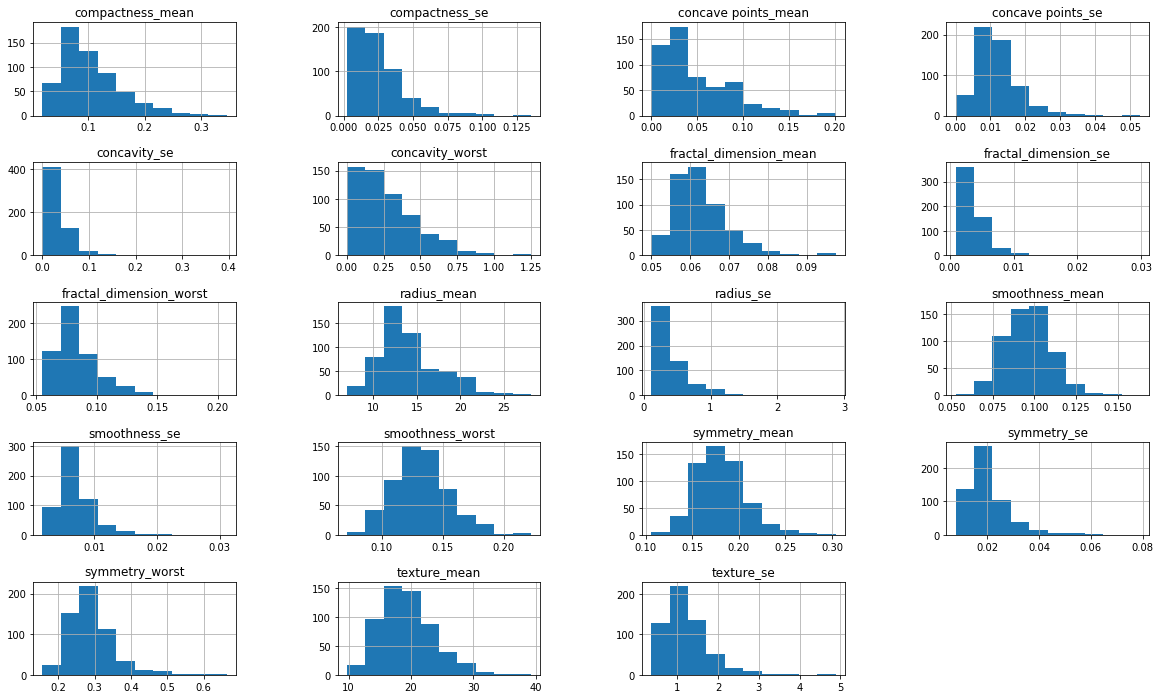

In [16]:
# Посмотрим на распределения признаков:
data.drop('diagnosis', axis = 1).hist(figsize = (20, 12));
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)


In [17]:
# Многие из признаков распределены нормально.
# Некоторые имеют преобладающие нулевые значения: compacthess_se, concavity_se, fractal_dimension_se, radius_se.

In [18]:
name_columns = list(data.columns)
name_columns.remove('diagnosis')
len(name_columns)


19

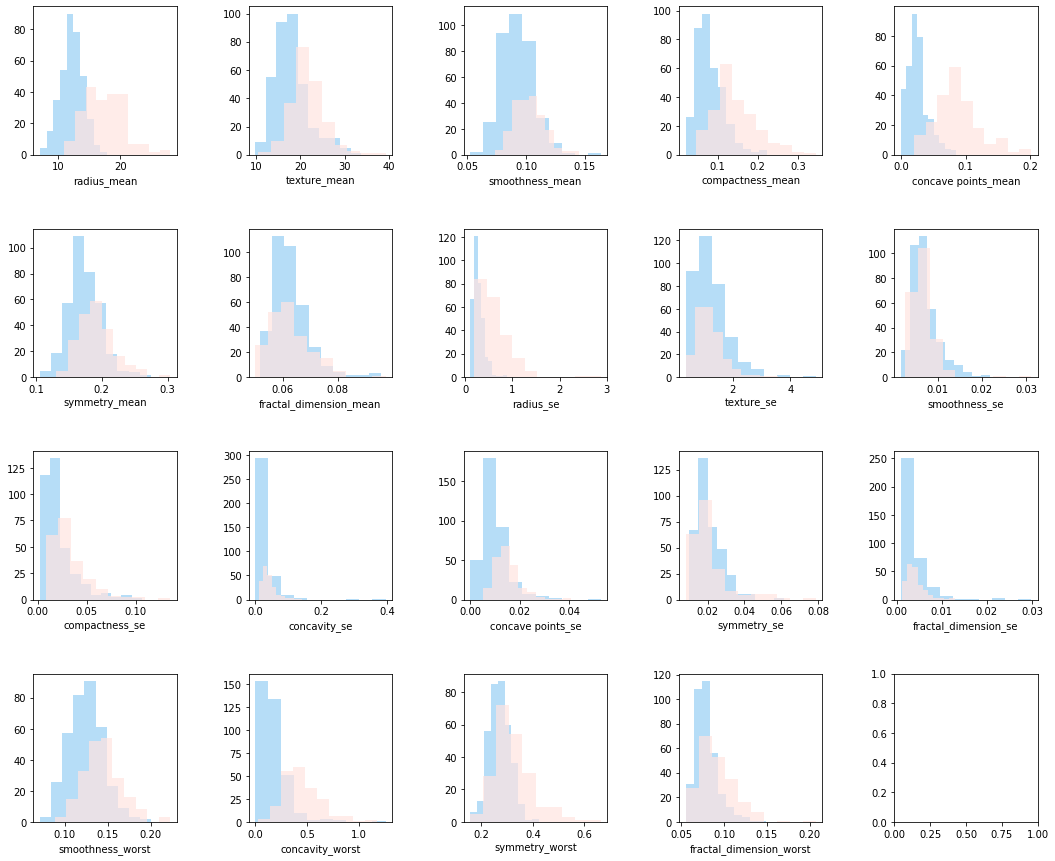

In [19]:
fig, axes = plt.subplots(nrows = 4, ncols = 5, figsize = (18, 15))

for idx, feat in enumerate(name_columns):
    axes[idx // 5, idx % 5].hist(data[data['diagnosis'] == 'B'][feat], color='#98cff4', alpha=0.7)
    axes[idx // 5, idx % 5].hist(data[data['diagnosis'] == 'M'][feat], color='#ffe4e1', alpha=0.7)
    axes[idx // 5, idx % 5].set_xlabel(feat)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    

In [20]:
# У некоторых признаков распределение для злокачественных образований смещенны вправо. Например 'radius_mean', 
# и, особенно, это видно на графике распределений признака "concave points_mean".


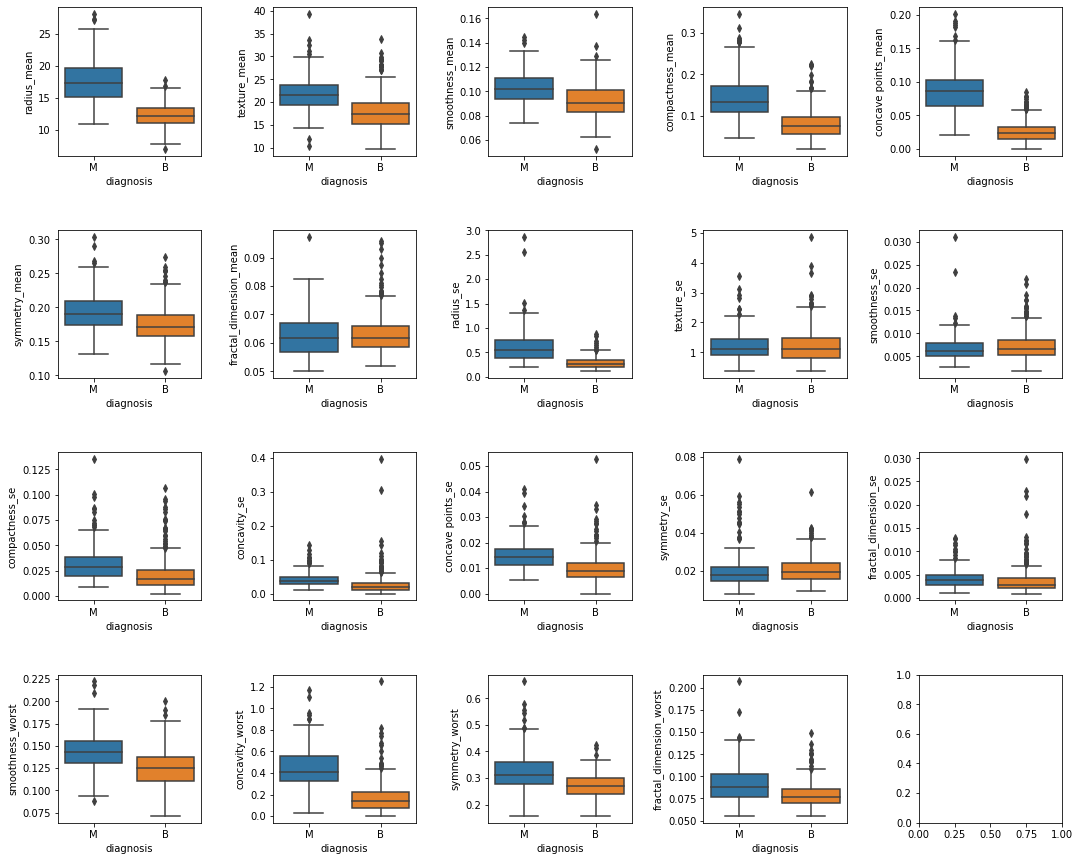

In [21]:
fig, axes = plt.subplots(nrows = 4, ncols = 5, figsize = (18, 15))

for idx, feat in enumerate(name_columns):
    sns.boxplot(x = 'diagnosis', y = feat, data = data, ax = axes[idx // 5, idx % 5])
    axes[idx // 5, idx % 5].set_xlabel('diagnosis')
    axes[idx // 5, idx % 5].set_ylabel(feat);
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    

In [22]:
# Как видно на графиках boxplot у злокачественных образований медиана и 50% данных следующих признаков имеют бОльшие значения, 
# чем у доброкачественных:
# concavity_worst, radius_se, concave points_mean, radius_mean и compactness_mean


In [23]:
# Переведем целевой признак в int:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data['diagnosis'].value_counts()


0    357
1    212
Name: diagnosis, dtype: int64

/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


CPU times: user 1min 28s, sys: 1.41 s, total: 1min 29s
Wall time: 1min 30s


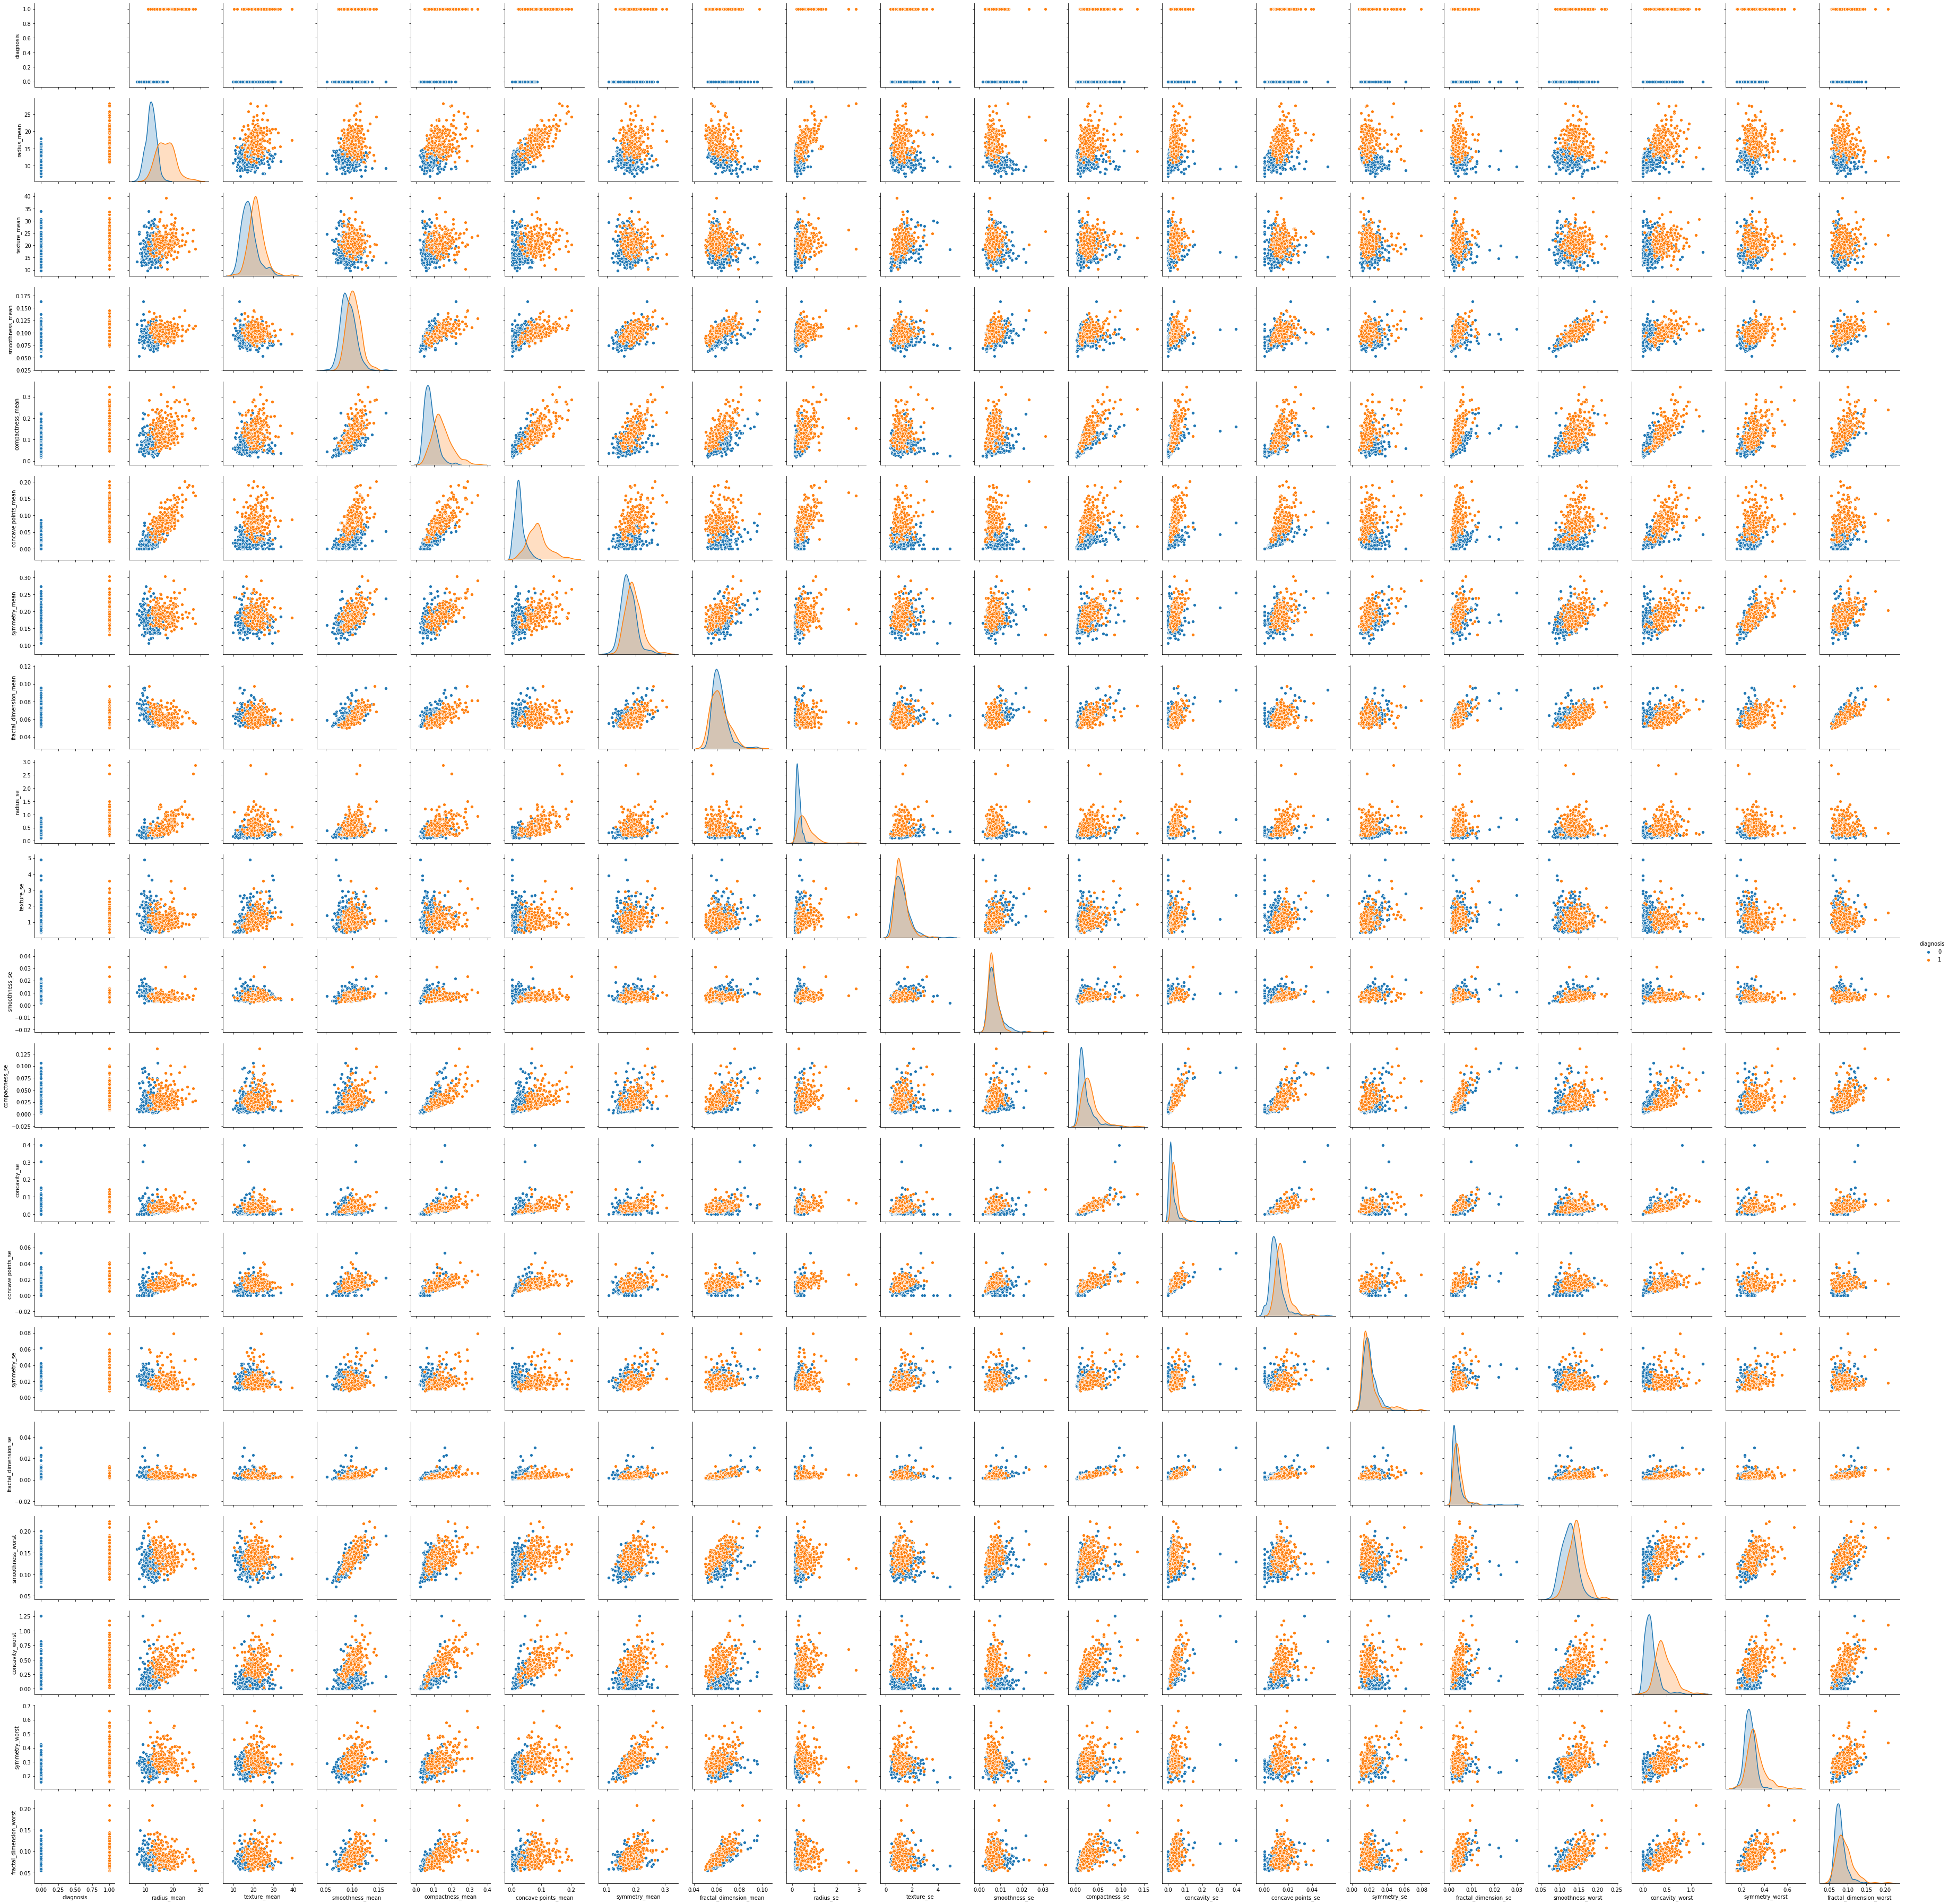

In [24]:
%%time
sns.pairplot(data = data, hue = 'diagnosis')


# Обучение

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


In [26]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))
    

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis = 1), 
    data['diagnosis'], 
    test_size = 0.30, 
    random_state = 42, 
    stratify = data['diagnosis']
)

# стандартизируем
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)


(398, 19) (171, 19)


In [28]:
log_reg = LogisticRegression(solver = 'lbfgs')

log_reg.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)


Train quality:
Accuracy: 0.987
Precision: 0.966
Recall: 1.000
f1_score: 0.983

Test quality:
Accuracy: 0.977
Precision: 0.938
Recall: 1.000
f1_score: 0.968


In [29]:
log_reg.coef_

array([[ 1.86016916,  1.30382766,  0.18902473, -0.19446626,  1.77161587,
        -0.34759048, -0.57201606,  1.9956492 ,  0.0655667 ,  0.125706  ,
        -0.8272744 , -0.13935281,  0.53380621, -0.6278336 , -0.48222496,
         0.58680249,  1.31150341,  1.39609355,  0.14903566]])

In [30]:
# LogisticRegression с настройками по умолчанию дал хороший результат)


/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


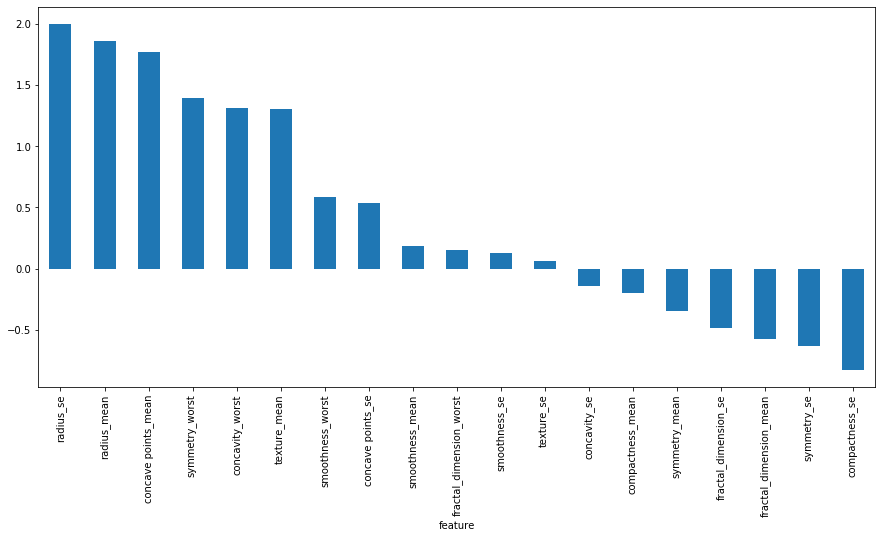

In [31]:
# Посмотрим на важность признаков:
featureImportance = pd.DataFrame({"feature": data.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(15, 7));


In [32]:
# В первую шестурку "влиятельных" признаков вошли 5 признаков, которые мы выделили на графиках boxplot.
# Т.е. те признаки, медиана которых сильно отличается для зло- и добро- качественных. 
# И тела свечей boxplot у них не пересекаются по значениям.


In [33]:
# Посмотрим на ROC AUC:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()
    

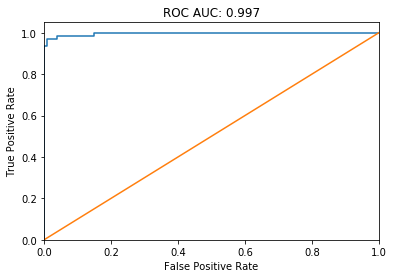

In [34]:
plot_roc_curve(log_reg.predict_proba(X_test_scaled)[:,1], y_test)


In [35]:
# Попробуем улучшить нашу модель путем подбора наилучших параметров:
log_reg_cv = LogisticRegressionCV(Cs = 100, solver = 'lbfgs')
log_reg_cv.fit(X_train_scaled, y_train);


/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: Conve

LogisticRegressionCV(Cs=100, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [36]:
log_reg_cv.coef_

array([[ 1.30614833,  0.88008424,  0.14517664,  0.17529652,  1.07824732,
        -0.0804495 , -0.52745758,  1.07040856,  0.02505889, -0.00857366,
        -0.32380002, -0.09958497,  0.31792485, -0.35245957, -0.29051774,
         0.48132594,  0.75586949,  0.78062011,  0.17564941]])

In [37]:
print("Train quality:")
quality_report(log_reg_cv.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg_cv.predict(X_test_scaled), y_test)


Train quality:
Accuracy: 0.987
Precision: 0.966
Recall: 1.000
f1_score: 0.983

Test quality:
Accuracy: 0.977
Precision: 0.938
Recall: 1.000
f1_score: 0.968


In [38]:
# Результат по основным метрикам качества остался таким же

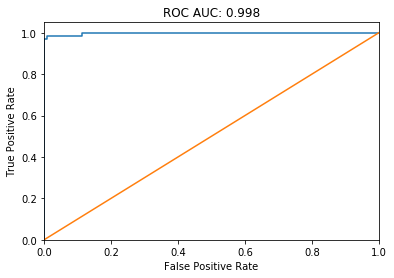

In [39]:
plot_roc_curve(log_reg_cv.predict_proba(X_test_scaled)[:,1], y_test)


In [40]:
# ROC AUC символически увеличился на 0.1%

/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


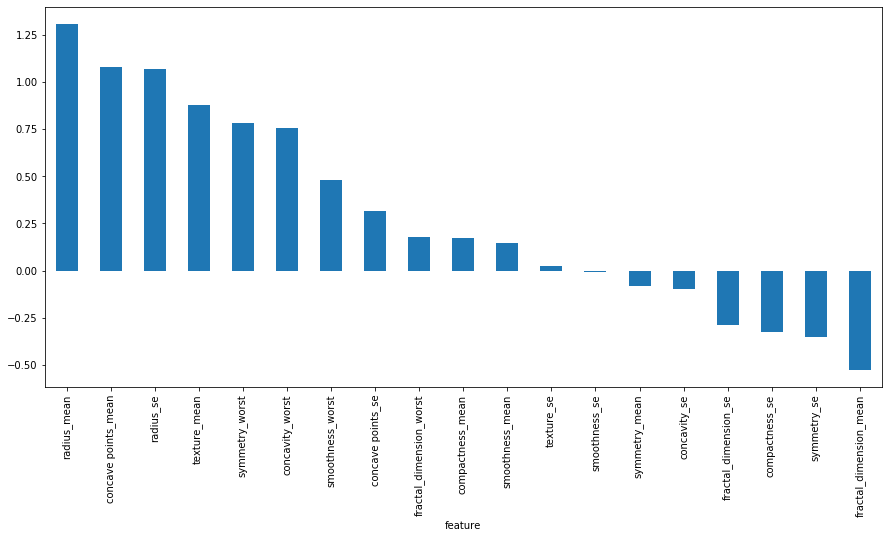

In [41]:
featureImportance = pd.DataFrame({"feature": data.drop('diagnosis',axis = 1).columns, 
                                  "importance": log_reg_cv.coef_[0]})

featureImportance.set_index('feature', inplace = True)
featureImportance.sort_values(["importance"], ascending = False, inplace = True)
featureImportance["importance"].plot('bar', figsize = (15, 7));


In [42]:
# ТОП-6 влиящих признаков не поменялся, но сменилась последовательность и уменьшился уровень влияния.
# Тоже самое и у признаков с 'отрицательным' влиянием.


# Вывод:

Сложно сравнивать метрики качества при столь малом количестве данных. 

Но, мы видим, что при примерно одинаковых результатах двух моделей коэффициенты при переменных оказались разные. 

При этом ТОП основных признаков остался таким же.


# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train);


In [45]:
print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)


Train quality:
Accuracy: 0.952
Precision: 0.885
Recall: 0.985
f1_score: 0.932

Test quality:
Accuracy: 0.918
Precision: 0.797
Recall: 0.981
f1_score: 0.879


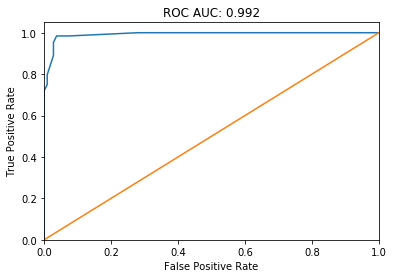

In [46]:
plot_roc_curve(knn.predict_proba(X_test_scaled)[:,1], y_test)


In [47]:
# Результаты получились хуже чем у ЛогРегрессии. Попробуем настроить параметр "количество соседей":
knn_params = {'n_neighbors': range(1, 100)}
knn_grid = GridSearchCV(knn, knn_params, cv = 5, verbose = True)
knn_grid.fit(X_train_scaled, y_train);


Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    4.2s finished


In [48]:
knn_grid.best_params_


{'n_neighbors': 7}

In [49]:
# Кросс-валидация говорит, что лучший результат достигается при n_neighbors = 7
# Проверим:


In [50]:
print("Train quality:")
quality_report(knn_grid.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn_grid.predict(X_test_scaled), y_test)


Train quality:
Accuracy: 0.970
Precision: 0.926
Recall: 0.993
f1_score: 0.958

Test quality:
Accuracy: 0.947
Precision: 0.891
Recall: 0.966
f1_score: 0.927


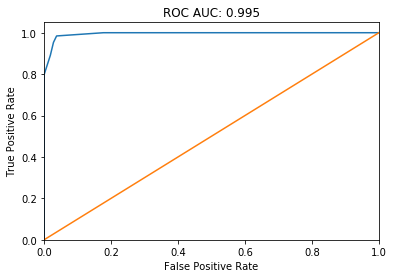

In [51]:
plot_roc_curve(knn_grid.predict_proba(X_test_scaled)[:,1], y_test)


In [53]:
# Да, результаты метрик улучшились,
# Но KNN не превзошел Логистическую Регрессию.